In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import visualization.visualize as visualize
import os
import transporters.transporters_factory as transporters_factory
import transporters.ptc_twiss.runner as madx_getter
from data.parameters_names import ParametersNames as Parameters
from data.grid_configuration import CanonicalCoordinatesGridConfiguration
from transporters.ptc_twiss.configuration import PtcTwissConfiguration
sns.set_style("whitegrid")

In [2]:
path_to_project = "path_to_folder_with_optics"

optic_folder_name = "2016"

xml_file_name = "configuration_reconst_beam1.xml"

In [3]:
item_number = 2
path_to_xml_file = os.path.join(path_to_project, optic_folder_name, xml_file_name)
ptc_twiss_configuration = PtcTwissConfiguration.get_configuration_from_file(path_to_xml_file, item_number)
ptc_twiss_transporter = transporters_factory.get_transporter(ptc_twiss_configuration)

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_folder_with_optics/2016/configuration_reconst_beam1.xml'

In [ ]:
x_mean = 0.1e-3
delta_x = 0
theta_x_mean = 150e-6
delta_theta_x = 10e-6
y_mean = 0
delta_y = 0
theta_y_mean = 0
delta_theta_y = 0
pt_mean = 0
delta_pt = 0

x_resolution = 1
theta_x_resolution = 11
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 1

grid_configuration = CanonicalCoordinatesGridConfiguration.from_delta(x_mean, delta_x, x_resolution,
                                                       theta_x_mean, delta_theta_x, theta_x_resolution,
                                                       y_mean, delta_y, y_resolution,
                                                       theta_y_mean, delta_theta_y, theta_y_resolution,
                                                        pt_mean, delta_pt, pt_resolution)
particles = grid_configuration.generate_grid()

In [ ]:
segments = ptc_twiss_transporter(particles)

f, axes = plt.subplots(1, 1)

pt = 0

matrix = segments["end"]

fig = plt.gcf()
fig.set_size_inches(5, 5)

title_sufix = r'ptc_twiss, pt = 0%, x = 0.1[mm]; $\theta_x$ = 140-160e-6; crossing_angle = 140; 2017_matched'

axes = visualize.plot_from_one_matrix(Parameters.S, Parameters.X, matrix, title_sufix=title_sufix, plot_function=sns.scatterplot)
axes.set_xlim(0,)

In [ ]:
s = 219.55

filtered_matrix = matrix.filter_equals(Parameters.S, s)

f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(20,20)

title_sufix = "ptc_twiss, s = 219.55, 2016"

visualize.plot_from_two_matrices(Parameters.THETA_X, Parameters.X, filtered_matrix, filtered_matrix, title_sufix, plot_function=sns.scatterplot, ax=axes[0][0])

visualize.plot_from_two_matrices(Parameters.THETA_X, Parameters.Y, filtered_matrix, filtered_matrix, title_sufix, ax=axes[0][1])

visualize.plot_from_two_matrices(Parameters.THETA_X, Parameters.D_X, filtered_matrix, filtered_matrix, title_sufix, ax=axes[1][0])

visualize.plot_from_two_matrices(Parameters.THETA_X, Parameters.D_Y, filtered_matrix, filtered_matrix, title_sufix, ax=axes[1][1])

In [4]:
path_to_xml_file = "/home/rafalmucha/Pobrane/optic/2016/configuration_reconst_beam1.xml"
station_number = 2
twiss_configuration = PtcTwissConfiguration.get_configuration_from_file(path_to_xml_file, station_number)

In [5]:
madx = madx_getter.get_initialized_madx(twiss_configuration)

In [24]:
twiss_output = madx.twiss(sequence="lhcb1", betx=0.4, bety=0.4, x=1e-3, px=140e-6)

In [25]:
particles_object = madx_getter.get_particles_object_from_output(twiss_output)

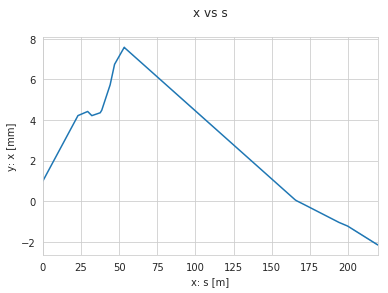

In [26]:
particles_object.plot(Parameters.S, Parameters.X)